## Grab and Run Yolov5 using Pytorch

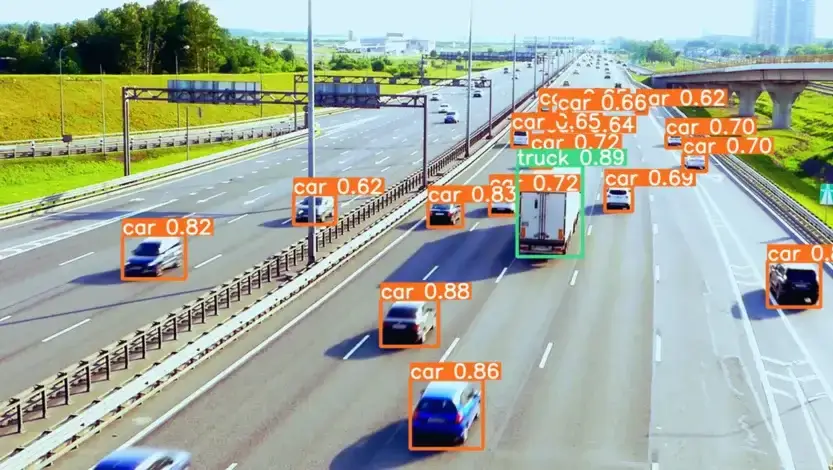

In [1]:
!wget https://thinkautonomous-tracking.s3.eu-west-3.amazonaws.com/tracking_course.zip && unzip tracking_course.zip

--2023-08-23 06:09:44--  https://thinkautonomous-tracking.s3.eu-west-3.amazonaws.com/tracking_course.zip
Resolving thinkautonomous-tracking.s3.eu-west-3.amazonaws.com (thinkautonomous-tracking.s3.eu-west-3.amazonaws.com)... 3.5.226.173, 3.5.224.12
Connecting to thinkautonomous-tracking.s3.eu-west-3.amazonaws.com (thinkautonomous-tracking.s3.eu-west-3.amazonaws.com)|3.5.226.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 632297503 (603M) [application/zip]
Saving to: ‘tracking_course.zip’

tracking_course.zip 100%[===================>] 603.01M  34.1MB/s    in 19s     

2023-08-23 06:10:04 (31.1 MB/s) - ‘tracking_course.zip’ saved [632297503/632297503]

Archive:  tracking_course.zip
   creating: tracking_course/
  inflating: __MACOSX/._tracking_course  
  inflating: tracking_course/coco.names  
  inflating: __MACOSX/tracking_course/._coco.names  
  inflating: tracking_course/.DS_Store  
  inflating: __MACOSX/tracking_course/._.DS_Store  
  inflating: tracking

In [2]:
# Clone ultralytics github repo
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15921, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 15921 (delta 16), reused 22 (delta 8), pack-reused 15880
Receiving objects: 100% (15921/15921), 14.66 MiB | 31.94 MiB/s, done.
Resolving deltas: 100% (10911/10911), done.


In [3]:
# Install Requirements
!pip install -r yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.3/609.3 kB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00


In [6]:
# import torch and opencv
import torch
import cv2

# Load Yolov5s Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, custom

# Read Images  using OpenCV
img = cv2.imread('/content/tracking_course/data/0000000000.png')

# Inferencing
results = model(img)

# Results
results.save()  # or .show(), .save(), .crop(), .pandas(), etc.

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-8-23 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
Saved 1 image to runs/detect/exp


In [12]:
import glob
from tqdm import tqdm

# saving results for a series of images

video_images = sorted(glob.glob("tracking_course/data/*.png"))
result_video = []

for img_path in tqdm(video_images):
    img = cv2.imread(img_path)
    results = model(img)
    results.save()

100%|██████████| 837/837 [01:52<00:00,  7.44it/s]


In [13]:
# writing .mp4 video

import re

out = cv2.VideoWriter('out_yolo_torch.mp4',cv2.VideoWriter_fourcc(*'MP4V'), 15, (img.shape[1],img.shape[0]))

for img_path in sorted(glob.glob("runs/detect/*/image0.jpg"), key=lambda x:float(re.findall("(\d+)",x)[0])):
    out.write(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
out.release()